## Linear Regression

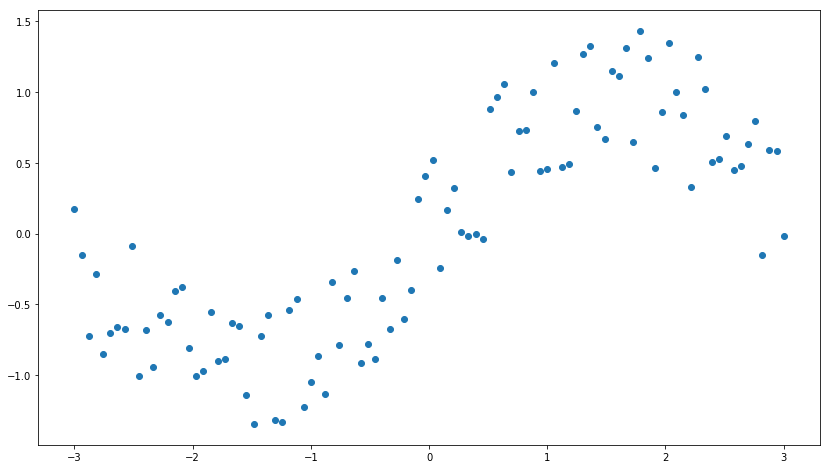

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

n_observations = 100
xs = np.linspace(-3,3,n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5,0.5,n_observations)
plt.figure(figsize=(14,8))
plt.scatter(xs,ys)

### placeholder

In [2]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

### initialize weights

In [3]:
W = tf.Variable(tf.random_normal([1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

Instructions for updating:
Colocations handled automatically by placer.


### compute prediction

In [4]:
Y_pred = tf.add(tf.multiply(X,W),b)

### compute loss function

In [5]:
loss = tf.square(Y-Y_pred,name='loss')

### initialize optimizer

In [6]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
#convex function can use GD and can get into global optimum

### set #of iterations and run the session

In [7]:
n_samples = xs.shape[0]
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init) # initialize variables
    writer = tf.summary.FileWriter('./graphs/linear_reg',sess.graph)
    
    for i in range(50):
        total_loss = 0
        for x,y in zip(xs,ys):
            _,l = sess.run([optimizer,loss],feed_dict={X:x,Y:y})
            total_loss += l
        if i%5 == 0:
            print('Epoch {0}:{1}'.format(i,total_loss/n_samples))
            
    writer.close()
    W,b = sess.run([W,b]) #run 才能取值

Epoch 0:[1.0273505]
Epoch 5:[0.20109992]
Epoch 10:[0.20109662]
Epoch 15:[0.20109661]
Epoch 20:[0.20109662]
Epoch 25:[0.20109661]
Epoch 30:[0.20109662]
Epoch 35:[0.20109661]
Epoch 40:[0.20109662]
Epoch 45:[0.20109661]


In [8]:
print(W,b)

[0.24352854] [-0.16943693]


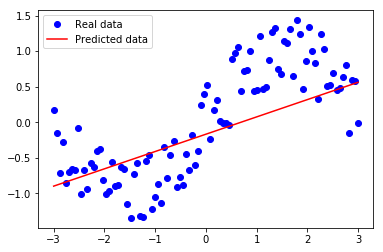

In [9]:
plt.plot(xs,ys,'bo',label='Real data')
plt.plot(xs,xs*W+b,'r',label='Predicted data')
plt.legend()
plt.show()

In [ ]:
!tensorboard --logdir='./graphs/linear_reg' --port=1234

## Polynormial Regression

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

n_observations = 100
xs = np.linspace(-3,3,n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5,0.5,n_observations)
plt.figure(figsize=(14,8))
plt.scatter(xs,ys)

In [ ]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [1]:
Y_pred = tf.add(tf.multiply(X,W),b)

W_2 = tf.Variable(tf.random_normal([1]),name='weight_2')
Y_pred = tf.add(tf.multiply(tf.pow(X,2),W_2),Y_pred)
W_3 = tf.Variable(tf.random_normal([1]),name='weight_3')
Y_pred = tf.add(tf.multiply(tf.pow(X,3),W_3),Y_pred)

NameError: name 'tf' is not defined

In [ ]:
sample_num = xs.shape[0]
loss = tf.reduce_sum(tf.pow(Y_pred-Y,2))/sample_num